In [1]:
import sys 
sys.path.append(r"C:\Users\Administrator\Documents\development\qcodes_dev")

import time 

import matplotlib.pyplot as plt 

import qcodes
from qcodes.instrument_drivers.stanford_research.SR860 import SR860
from qcodes.instrument_drivers.QuTech.IVVI import IVVI

In [2]:
sr = SR860("sr", "GPIB0::4::INSTR")

Connected to: Stanford_Research_Systems SR860 (serial:003101, firmware:V1.47) in 0.15s


In [3]:
ivvi = IVVI("ivvi", "COM4")

Initialized IVVI-rack in 0.03s


C:\Users\Administrator\Documents\development\qcodes_dev\qcodes\instrument\parameter.py:182: UserWarning: Delay kwarg is deprecated. Replace with inter_delay or post_delay as needed
  warnings.warn("Delay kwarg is deprecated. Replace with "


In [4]:
sr.buffer.capture_config("X,Y")
data = sr.buffer.capture_samples(100)

In [5]:
len(data["X"])

100

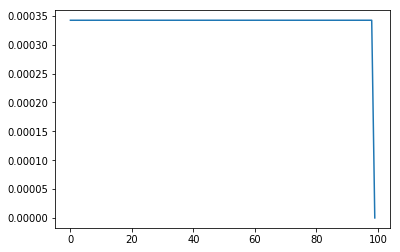

In [6]:
plt.plot(data["X"])
plt.show()

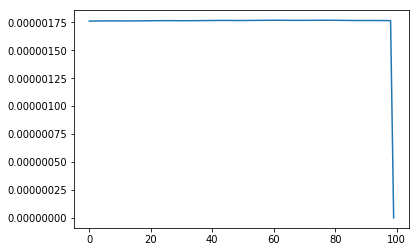

In [7]:
plt.plot(data["Y"])
plt.show()

# Lets capture by sending triggers. We use the Yokogawa GS200 to send triggers, which is not yet in the main branch. Nevertheless, it should be clear from the example how the capturing works

In [8]:
def send_trigger(): 
    ivvi.trigger()
    time.sleep(0.1)

In [9]:
n_samples = 100
sr.buffer.start_capture("ONE", "SAMP")

time.sleep(0.1)
for _ in range(n_samples): 
    send_trigger()

sr.buffer.stop_capture()

data = sr.buffer.get_capture_data(n_samples)

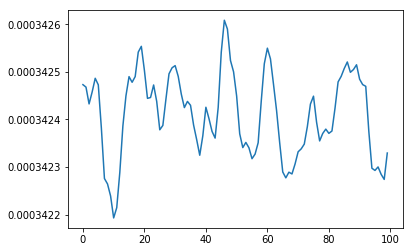

In [10]:
plt.plot(data["X"])
plt.show()

In [11]:
len(data["X"])

100

In [12]:
meas = qcodes.Measure(sr.buffer_values)
data = meas.run()

ValueError: setting an array element with a sequence.